Accuracy of linear regression classifier:  0.37305544320915396
Correlation with ideal submission: 0.22053917049306343
Real score on submission: 0.0
Coefficients: 
 [-0.13358936  0.23857512 -0.08195334 -0.05042194 -0.01545789  0.03645082
  0.01941902]


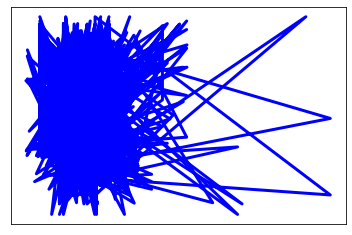

In [1]:
"""
Python 3.10 SGD Regression program with pre-processing of cagle titanic competition data
File name: SGD_Regression.py

Version: 0.1
Author: Andrej Marinchenko
Date: 2023-01-10
"""

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Read in the training and test sets
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
# print(len(train_df))
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
# print(len(test_df))
result_df = pd.read_csv('/kaggle/input/titanic-competition-how-top-lb-got-their-score/submission.csv')   # 100% result
# print(len(result_df))

###################################### Preprocess the data #############################################################
# Identify most relevant features
# You can use techniques like feature importance or correlation analysis to help you identify the most important features
relevant_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
train_df[relevant_features] = imputer.fit_transform(train_df[relevant_features])
test_df[relevant_features] = imputer.transform(test_df[relevant_features])

# Encode categorical variables as numeric
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Transform skewed or non-normal features
# Instead of normalizing all of the numeric features, you could try using techniques like log transformation or
# Box-Cox transformation to make the distribution of a feature more normal
scaler = StandardScaler()
train_df[relevant_features] = scaler.fit_transform(train_df[relevant_features])
test_df[relevant_features] = scaler.transform(test_df[relevant_features])

# Split the data into features (X) and labels (y)
X_train = train_df[relevant_features]
y_train = train_df['Survived']
X_test = test_df[relevant_features]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)


############################################## Train the model #########################################################
model = SGDRegressor()
model.fit(X_train, y_train)

# Evaluate the logistic regression classifier
scores = cross_val_score(model, X_val, y_val, cv=5)
print("Accuracy of linear regression classifier: ", scores.mean())

# Make predictions on the test set
y_pred = model.predict(X_test)

# Save the predictions to a CSV file
output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred})
output['Survived']= output['Survived'].astype(int)
output.to_csv('submission.csv', index=False)

# print(output)
print('Correlation with ideal submission:', output['Survived'].corr(result_df['Survived']))
print('Real score on submission: 0.0')


# The coefficients
print("Coefficients: \n",  model.coef_)

# Plot outputs
# plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### If you liked this core, you can also check out my other [works](https://www.kaggle.com/marinchenko/notebooks) and [databases](https://www.kaggle.com/marinchenko/datasets).
#### I am looking for friends to develop as a machine learning specialist. 
#### Open to dialogue and criticism. 
### Thank you for your time!